In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('NewData.csv')

In [3]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import MWETokenizer
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [27]:
words = []
stop_words = set(stopwords.words("indonesian"))

for i in data['Combined']:
    temp = []
    result = word_tokenize(i)
    
    for j in result:
        if j not in stop_words:
            temp.append(j)
    
    words.append(temp)

In [5]:
finale_words_bi = []
finale_words_tri = []
finale_words_quad = []
finale_words_penta = []
finale_words_hexa = []


for i in words:
    bi_words = nltk.bigrams(i)
    tri_words = nltk.trigrams(i)
    quad_words = nltk.ngrams(i, 4)
    penta_words = nltk.ngrams(i, 5)
    hexa_words = nltk.ngrams(i, 6)
    
    for j in bi_words:
        finale_words_bi.append(" ".join(j))
        
    for k in tri_words:
        finale_words_tri.append(" ".join(k))
        
    for l in quad_words:
        finale_words_quad.append(" ".join(l))
        
    for m in penta_words:
        finale_words_penta.append(" ".join(m))
    
    for n in hexa_words:
        finale_words_hexa.append(" ".join(n))

In [6]:
for i in finale_words_hexa:
    print(i)
    break

kapolri polisi selektif tangan langgar ite


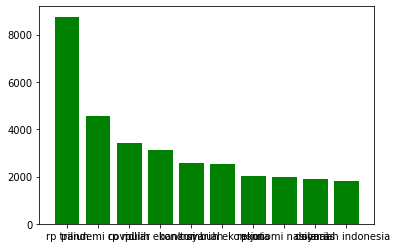

In [7]:
from nltk.probability import FreqDist

# frequency of Bigrams
n_freq_bi = nltk.FreqDist(finale_words_bi)

# Bigrams
n_freq_bi = pd.DataFrame.from_dict(n_freq_bi, orient='index')

n_freq_bi.columns = ['Frequency']
n_freq_bi.index.name = '2Words'

n_freq_bi = n_freq_bi.sort_values('Frequency', ascending=False)

n_freq_bi.to_csv(r'Bigrams.csv')

df_bi = n_freq_bi.head(10)

import matplotlib.pyplot as plt

plt.bar(df_bi.index, df_bi['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

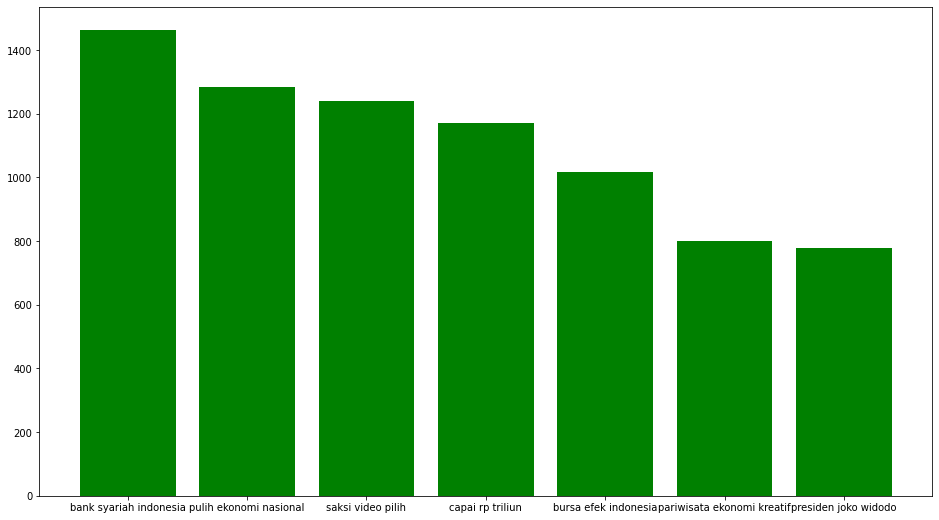

In [8]:
# frequency of Trigrams
n_freq_tri = nltk.FreqDist(finale_words_tri)

# Trigrams
n_freq_tri = pd.DataFrame.from_dict(n_freq_tri, orient='index')

n_freq_tri.columns = ['Frequency']
n_freq_tri.index.name = '3Words'

n_freq_tri = n_freq_tri.sort_values('Frequency', ascending=False)

n_freq_tri.to_csv(r'Trigrams.csv')

df_tri = n_freq_tri.head(7)

plt.bar(df_tri.index, df_tri['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

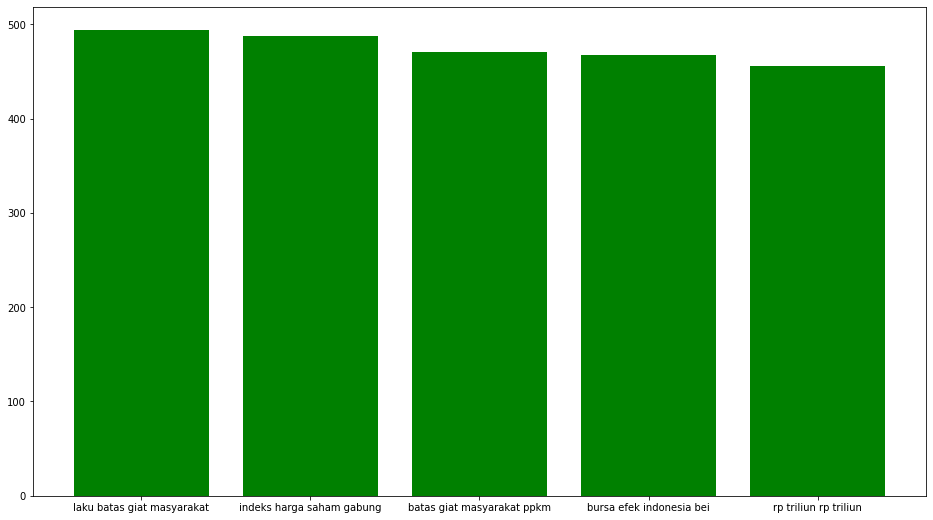

In [9]:
# frequency of Quadgrams
n_freq_quad = nltk.FreqDist(finale_words_quad)

# Quadgrams
n_freq_quad = pd.DataFrame.from_dict(n_freq_quad, orient='index')

n_freq_quad.columns = ['Frequency']
n_freq_quad.index.name = '4Words'

n_freq_quad = n_freq_quad.sort_values('Frequency', ascending=False)

n_freq_quad.to_csv(r'Quadgrams.csv')

df_quad = n_freq_quad.head(5)

plt.bar(df_quad.index, df_quad['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

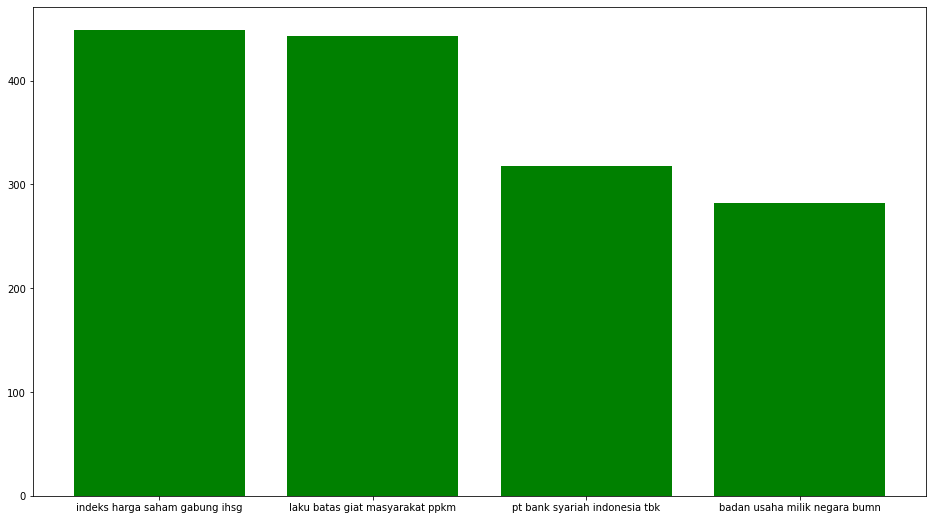

In [10]:
# frequency of Pentagrams
n_freq_penta = nltk.FreqDist(finale_words_penta)

# Pentagrams
n_freq_penta = pd.DataFrame.from_dict(n_freq_penta, orient='index')

n_freq_penta.columns = ['Frequency']
n_freq_penta.index.name = '5Words'

n_freq_penta = n_freq_penta.sort_values('Frequency', ascending=False)

n_freq_penta.to_csv(r'Pentagrams.csv')

df_penta = n_freq_penta.head(4)

plt.bar(df_penta.index, df_penta['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

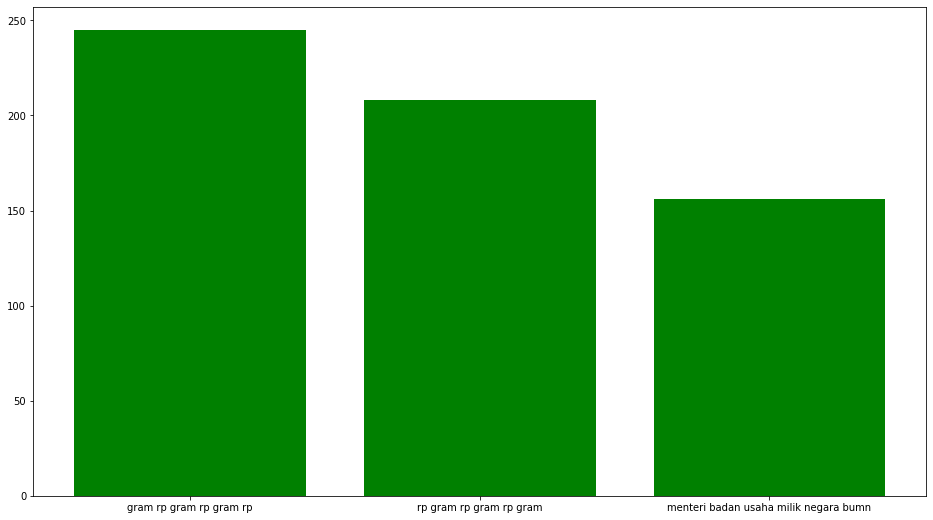

In [11]:
# frequency of Hexagrams
n_freq_hexa = nltk.FreqDist(finale_words_hexa)

# Hexagrams
n_freq_hexa = pd.DataFrame.from_dict(n_freq_hexa, orient='index')

n_freq_hexa.columns = ['Frequency']
n_freq_hexa.index.name = '6Words'

n_freq_hexa = n_freq_hexa.sort_values('Frequency', ascending=False)

n_freq_hexa.to_csv(r'Hexagrams.csv')

df_hexa = n_freq_hexa.head(3)

plt.bar(df_hexa.index, df_hexa['Frequency'], color='green')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [12]:
from gensim.models import Word2Vec

model = Word2Vec(words, min_count=1, size=200, sg=1) # Skip

In [13]:
model.most_similar("covid")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('corona', 0.7929530739784241),
 ('korona', 0.7266880869865417),
 ('vid', 0.7261953949928284),
 ('virus', 0.7233370542526245),
 ('covld', 0.7050809860229492),
 ('covidl', 0.700441837310791),
 ('vims', 0.687369704246521),
 ('ebola', 0.6865314245223999),
 ('ipong', 0.6848257780075073),
 ('sars', 0.6842045783996582)]

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


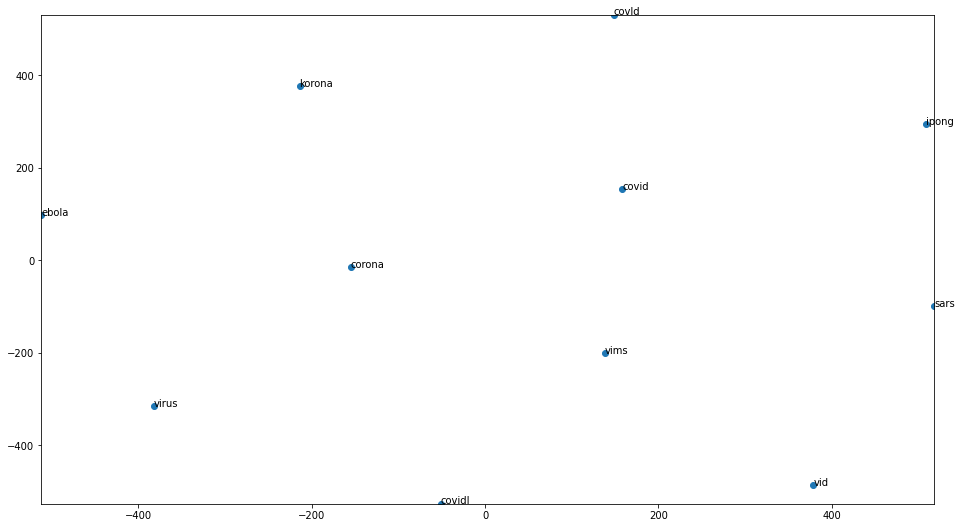

In [14]:
import numpy as np
from sklearn.manifold import TSNE

def display_closestwords_tsnescatterplot(model, word, size):
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    
    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
display_closestwords_tsnescatterplot(model, 'covid', 200) 

In [19]:
data1 = pd.read_csv('NewData1.csv')

,Unnamed: 0,Combined
0,0,gubernur nurdin resmi sangka korupsi dengan ba...
1,1,aspal buton target penuh butuh nasional ekonom...
2,2,investor asing lepas saham emiten kapital besa...
3,3,harga minyak lesat usaha migas belum juga sulu...
4,4,amat pres yang atur investasi miras buat tarik...
...,...,...
10976,10976,ribu masyarakat ntb data miskin daerah kbrn ma...
10977,10977,aceh kembali jadi provinsi miskin ekonomi kbrn...
10978,10978,sangka asabri jimmy sutopo langsung tahan di r...
10979,10979,trenggono sandiaga uno sepakat kembang wisata ...


In [29]:
words1 = []
stop_words = set(stopwords.words("indonesian"))

for z in data1['Combined']:
    temp = []
    result = word_tokenize(str(z))
    
    for a in result:
        if a not in stop_words:
            temp.append(a)
    
    words1.append(temp)

In [30]:
model1 = Word2Vec(words1, min_count=1, size=200, sg=1) # Skip

In [31]:
model1.most_similar("covid")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('covd', 0.7473905682563782),
 ('corona', 0.7313916087150574),
 ('vid', 0.7180896401405334),
 ('korona', 0.7160436511039734),
 ('virus', 0.6747106313705444),
 ('coid', 0.6588837504386902),
 ('resurgensi', 0.6568844318389893),
 ('imunisasi', 0.6560494899749756),
 ('kluge', 0.6521903872489929),
 ('adisasmito', 0.6428635120391846)]